In [22]:
import pandas as pd

data = {'8': [[1,3]],'9':None}

In [23]:
data['8'].append(5)

In [24]:
data['8']

[[1, 3], 5]

In [13]:
list_{digit}.append(3)

SyntaxError: invalid syntax (4220664221.py, line 1)

In [31]:
import numpy as np
a = np.array([1,4])

In [38]:
b = a.tolist()

In [48]:
''.join(map(str, a))

'14'

In [55]:
array_da_riordinare = np.array(['f','b','b','b','b'])

a = np.array(['e','f','h','b','c'])
_ , counts = np.unique(a,return_counts=True)
print(counts)

[1 1 1 1 1]


ValueError: `bins` must increase monotonically, when an array

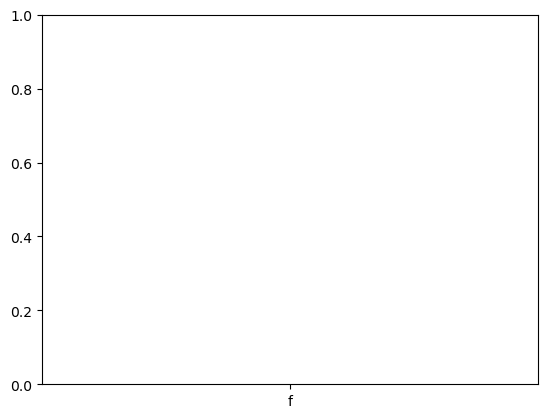

In [56]:
#1 riordinare
2# contare
import matplotlib.pyplot as plt
plt.hist(array_da_riordinare, a)
plt.show()

In [58]:
# trasformare gli stati in numeri.

stati = np.array(['00','01','10','11'])
staticount = np.array(['01','01','00'])

In [64]:
stati.astype(np.int64())

array([ 0,  1, 10, 11])

In [65]:
np.int64?

Init signature: np.int64(self, /, *args, **kwargs)
Docstring:     
Signed integer type, compatible with Python `int` and C ``long``.

:Character code: ``'l'``
:Canonical name: `numpy.int_`
:Alias on this platform (Linux x86_64): `numpy.int64`: 64-bit signed integer (``-9_223_372_036_854_775_808`` to ``9_223_372_036_854_775_807``).
:Alias on this platform (Linux x86_64): `numpy.intp`: Signed integer large enough to fit pointer, compatible with C ``intptr_t``.
File:           ~/anaconda3/lib/python3.12/site-packages/numpy/__init__.py
Type:           type
Subclasses:     

(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

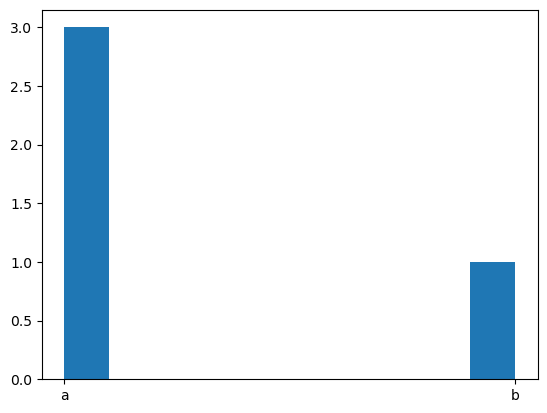

In [68]:
a = np.array(['a','a','a', 'b'])
plt.hist(a)